#### this is the exploratory data analysis of All state Claim 
- the graph will be done in Seaborn package

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [32]:
import os

os.chdir(r"J:\Tutorial\Kaggle Competitions\AllState")
train = pd.read_csv("train.csv", nrows=60000)
test  = pd.read_csv('test.csv', nrows=60000)
#train = pd.read_csv("train.csv")
#test  = pd.read_csv('test.csv')
combined = [train, test]
combined = pd.concat(combined)
print(combined.shape)

# find the skewness of the dataset
print(combined.skew())

(120000, 132)
cont1     0.515394
cont10    0.354148
cont11    0.284591
cont12    0.294801
cont13    0.373548
cont14    0.247789
cont2    -0.310958
cont3    -0.002756
cont4     0.419745
cont5     0.676800
cont6     0.455183
cont7     0.832015
cont8     0.680459
cont9     1.066590
id        0.329354
loss      4.232704
dtype: float64


(120000, 14)
Counter({False: 60000, True: 60000})
Counter({False: 60000})


C:\Users\ting\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


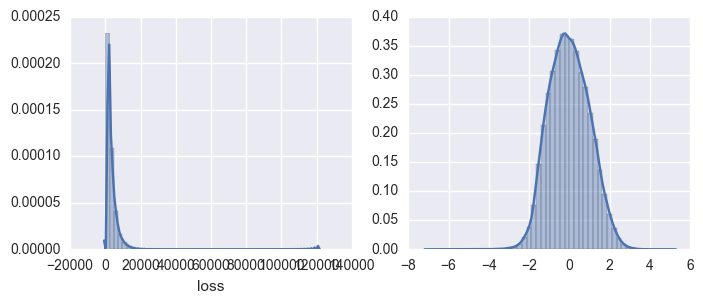

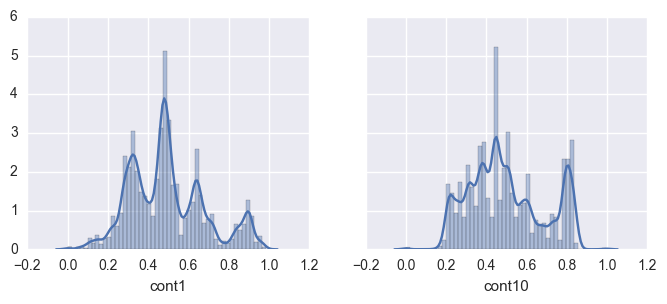

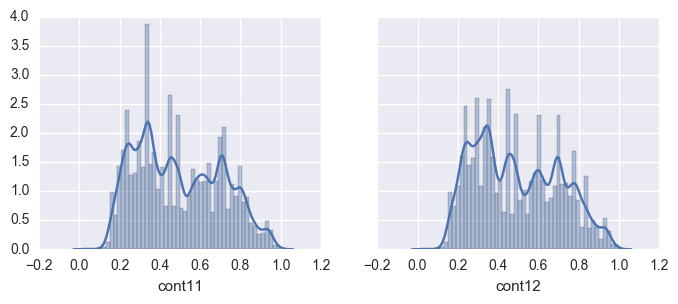

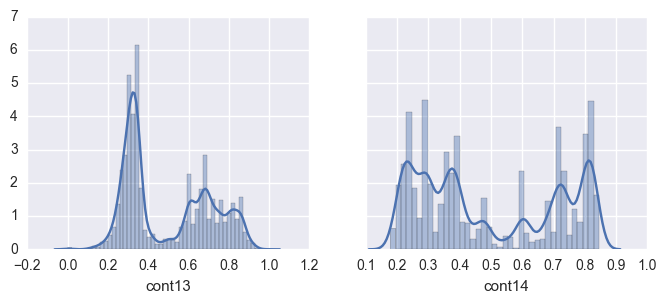

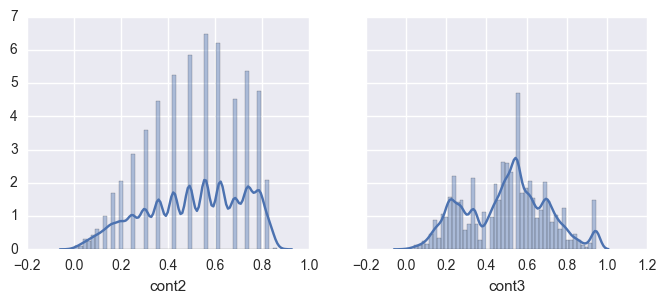

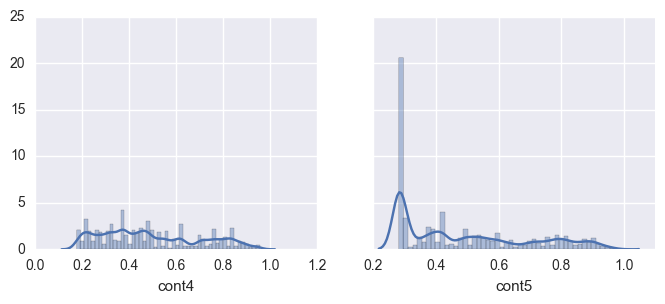

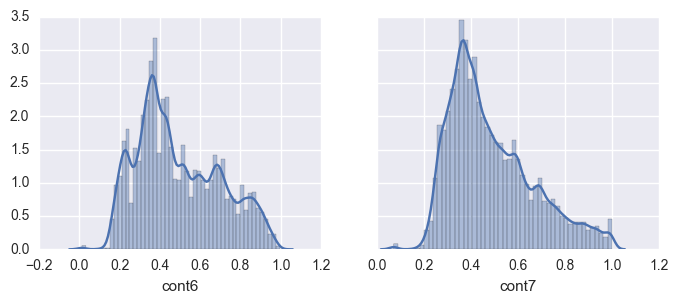

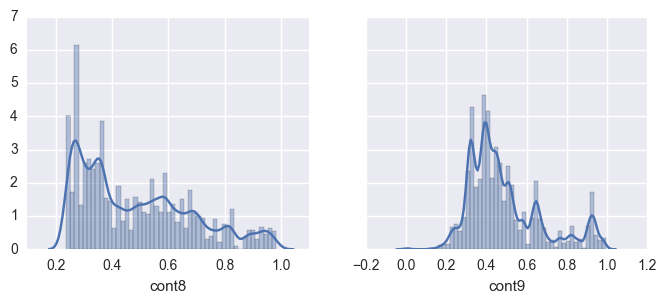

In [31]:
# the reason I re-start here is because I don't want to load large amount of
# data each time. It will speed up everything
import seaborn as sns
from sklearn import preprocessing
import math
from collections import Counter

#sns.set(color_codes=True)
#sns.set(style="white", palette="muted")

Xtrain = train.copy()
Xtest  = test.copy()
Xcombined = combined.copy()

ids = Xcombined['id']
loss = Xcombined['loss']
Xcombined.drop(['id', 'loss'], 1, inplace=True)
all_nums = Xcombined.select_dtypes(exclude=[object])
print(all_nums.shape)
#all_nums = preprocessing.scale(all_nums)
#print(all_nums.head())

# target distribution
print(Counter(np.isnan(loss)))

# as test dataset doesn't have loss, so we need to separate them or mask them
# loss.fillna(0, inplace=True)
loss = loss[:Xtrain.shape[0],]
print(Counter(np.isnan(loss)))

fig, ax = plt.subplots(1, 2, sharey=False, figsize=(8,3))
sns.distplot(loss, ax=ax[0])

# the loss target is log-normal distributed, we will transform it to normal
loss = np.log(loss.values)
loss = preprocessing.scale(loss)
sns.distplot(loss, ax=ax[1])
plt.show()

# for all numeric distribution
nrows = 7
ncols = 2
col_names = all_nums.columns

for i in range(nrows):
    fig, ax = plt.subplots(nrows=1, ncols=ncols, sharey=True, figsize=(8,3))
    for j in range(ncols):
        #print(col_names[i*ncols+j])
        #print(all_nums[col_names[i*ncols+j]][2:5])
        sns.distplot(all_nums[col_names[i*ncols+j]], ax=ax[j])
        
#for col in all_nums.columns:
    #length = max(all_nums[col]) - min(all_nums[col])
    #print(length)
    #sns.distplot(all_nums[col], bins=np.arange(0,max(all_nums[col])))
    #plt.hist(all_nums[col])
    #sns.distplot(all_nums[col])
    #plt.show()

# check to see the relationship among the numeric part of the data
#sns.pairplot(all_nums)
plt.show()
#cols = all_nums.columns.values
# sns.distplot(all_nums[cols[0]] * math.sin(all_nums[cols[0]]))
# sns.distplot(math.asin(all_nums[cols[0]]))
#sns.distplot(all_nums[cols[0]])
#plt.show()

C:\Users\ting\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


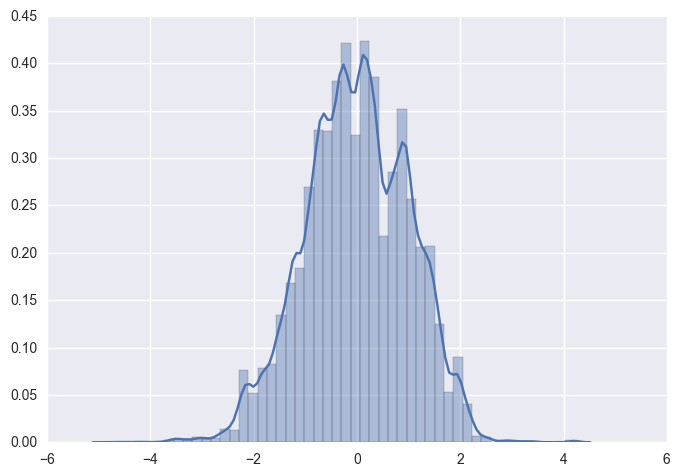

In [64]:
cont1_3 = all_nums['cont1']+all_nums['cont3']
cont1_3 = preprocessing.scale(cont1_3)
sns.distplot(cont1_3)

plt.show()

C:\Users\ting\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


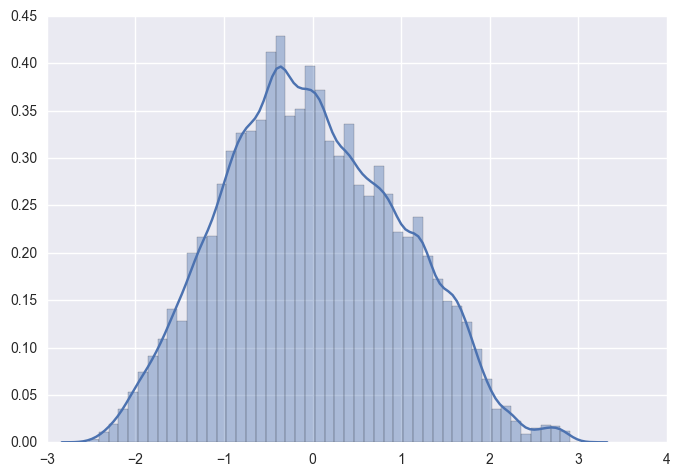

In [71]:
cont2_4_5 = all_nums['cont2']+all_nums['cont5']+all_nums['cont4']
cont2_4_5 = preprocessing.scale(cont2_4_5)
sns.distplot(cont2_4_5)

plt.show()

C:\Users\ting\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


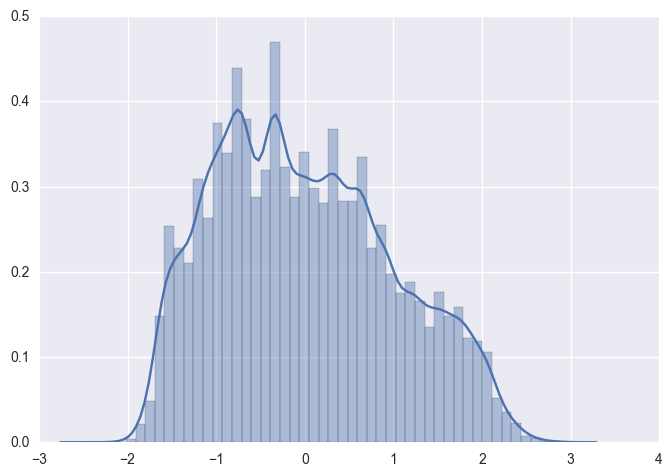

In [111]:
cont3_13 = all_nums['cont8']+all_nums['cont7']+all_nums['cont12']
cont3_13 = preprocessing.scale(cont3_13)
sns.distplot(cont3_13)

plt.show()

C:\Users\ting\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


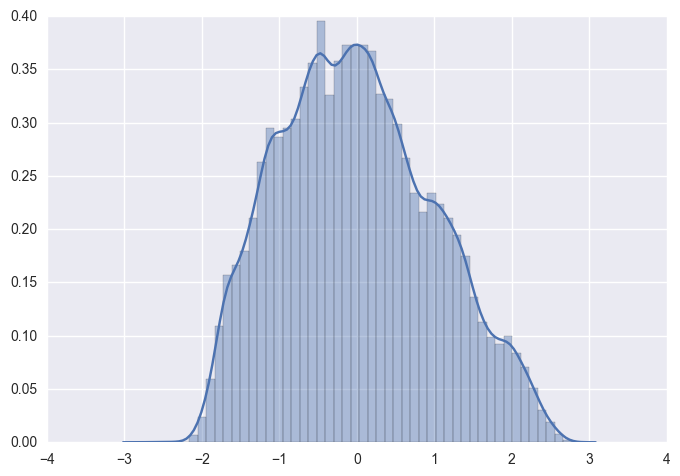

In [103]:
cont10_11_12 = all_nums['cont11']+all_nums['cont14']+all_nums['cont6']
cont10_11_12 = preprocessing.scale(cont10_11_12)
sns.distplot(cont10_11_12)

plt.show()

C:\Users\ting\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


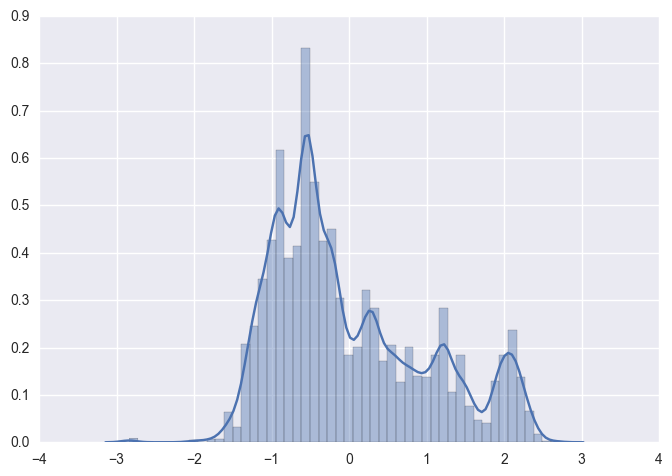

In [109]:
cont10_11_12 = all_nums['cont13']+all_nums['cont9']+all_nums['cont10']
cont10_11_12 = preprocessing.scale(cont10_11_12)
sns.distplot(cont10_11_12)

plt.show()